In [6]:
# --------------------------------------------------------
# BLOQUE 1 - IMPORTACIONES Y PREPROCESAMIENTO DE LOS DATOS
# --------------------------------------------------------


# 0. Importar las librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Cargar el conjunto de datos de cristales
df = pd.read_csv("glass.csv")
X = df.drop(columns=["10", "0"]) # Eliminamos la variable objetivo y la primera columna que corresponde a IDs
y = df["10"]

# Escalar el conjunto de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Gestión de outliers (usaremos el rango intercuartílico para detectar outliers)
Q1 = np.percentile(X_scaled, 25, axis=0)
Q3 = np.percentile(X_scaled, 75, axis=0)
IQR = Q3 - Q1
outliers_condition = ((X_scaled < (Q1 - 1.5 * IQR)) | (X_scaled > (Q3 + 1.5 * IQR)))

# Sustituir outliers con los valores más cercanos dentro del rango permitido
X_scaled_outliers_handled = np.copy(X_scaled)
for i in range(X_scaled.shape[1]):
    X_scaled_outliers_handled[:, i] = np.clip(X_scaled_outliers_handled[:, i], - 1.5 * IQR[i], Q3[i] + 1.5 * IQR[i])

c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\SergioSF\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\SergioSF\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fd

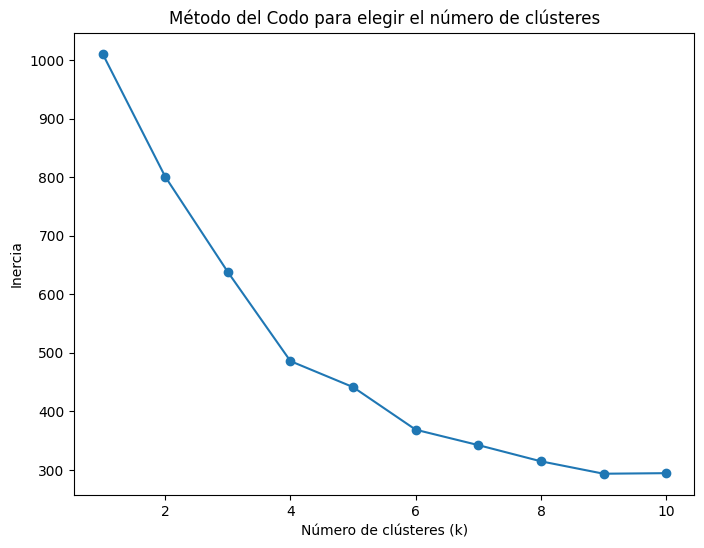

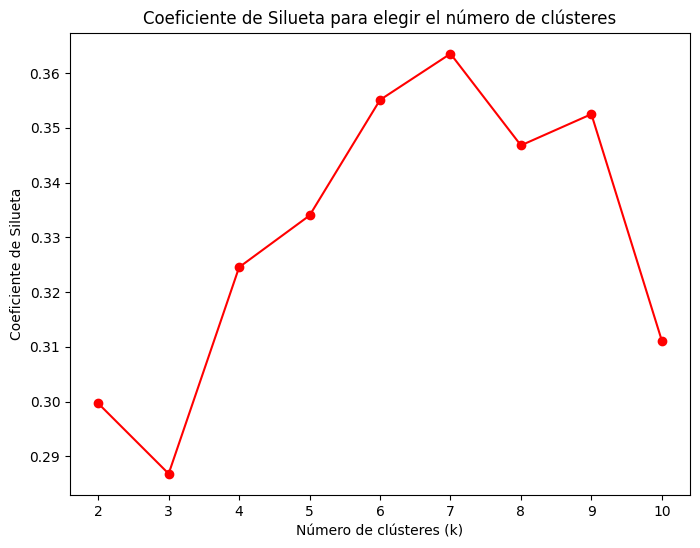

In [ ]:
# -------------------------------------------------------------------------

# ---------------------------------------
# BLOQUE 2 - AJUSTE INICIAL DE PARÁMETROS
# ---------------------------------------

# 3. Método del Codo: Determinar el número óptimo de clústeres
inertia = []  # Guardaremos la inercia para diferentes valores de k (número de clústeres)
for k in range(1, 11):  # Probar para k = 1 hasta k = 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_outliers_handled)
    inertia.append(kmeans.inertia_)

# Graficar la inercia para cada k (Método del Codo)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo para elegir el número de clústeres')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.show()

# 4. Coeficiente de Silueta: Evaluar la calidad de los clústeres para diferentes valores de k
sil_scores = []  # Guardamos los coeficientes de silueta para cada k
for k in range(2, 11):  # El coeficiente de silueta solo es válido para k >= 2
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_outliers_handled)
    sil_score = silhouette_score(X_scaled_outliers_handled, kmeans.labels_)  # Calculamos el coeficiente de silueta
    sil_scores.append(sil_score)

# Graficar el coeficiente de silueta para cada k
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o', color='red')
plt.title('Coeficiente de Silueta para elegir el número de clústeres')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Coeficiente de Silueta')
plt.show()

Silhouette Score para el modelo con 7 clústeres: 0.36352662999298957


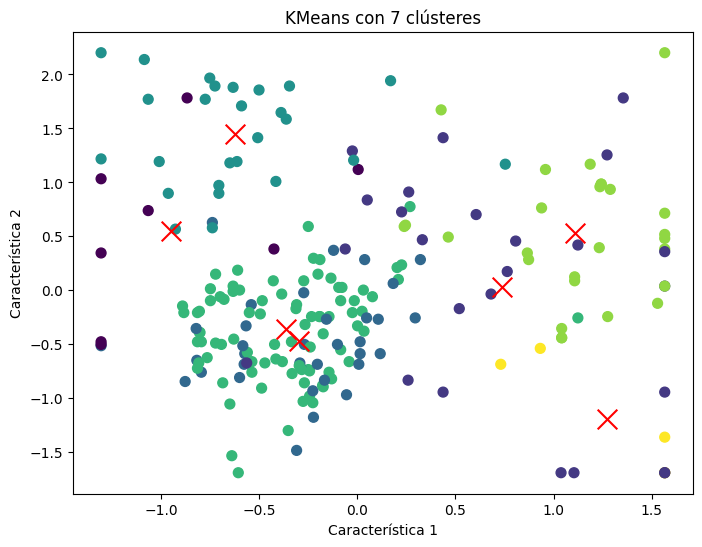

Número óptimo de clústeres según el Método del Codo y el Coeficiente de Silueta: 7
Centroides de los clústeres:
[[-0.94610145  0.55345919 -0.08531734  1.24742273 -1.03993392  0.88943475
  -0.95682713 -0.35287683 -0.43214702]
 [ 0.73820351  0.03486662 -1.04436443 -0.0295627   0.02716354 -0.33543476
   0.91742847 -0.35287683 -0.29841698]
 [-0.29485409 -0.46870452  0.56707405 -0.28547365  0.25095643  0.09278566
  -0.30634957 -0.35287683  1.4268474 ]
 [-0.6209567   1.45203936 -1.46963188  1.17348097  0.79006196 -0.65921826
  -0.21114752 -0.35287683 -0.43214702]
 [-0.36050339 -0.36250728  0.54525344 -0.12198286  0.2400936   0.12452822
  -0.39739796 -0.35287683 -0.49410236]
 [ 1.11038799  0.52822816  0.6495515  -1.00666011 -1.08882883 -0.52484745
   0.39061973 -0.35287683 -0.12163426]
 [ 1.27223922 -1.19211757 -1.38767176  0.57637511 -0.67689626 -0.02621325
   1.01423621 -0.35287683  1.96470666]]


In [9]:

# A partir de la gráfica, elegimos el número óptimo de clústeres (suponemos k=6)
optimal_k = 7

# -------------------------------------------------------------------------

# ---------------------------------------------------------------------
# BLOQUE 3 - CREAMOS Y ENTRENAMOS EL MODELO CON EL Nº DE CLÚSTER ÓPTIMO
# ---------------------------------------------------------------------

# 5. Aplicar KMeans con el número óptimo de clústeres
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled_outliers_handled)


# -------------------------------------------------------------------------

# --------------------------------------------------
# BLOQUE 4 - EVALUAMOS Y VISUALIZAMOS LOS RESULTADOS
# --------------------------------------------------
# 6. Evaluación del modelo usando Silhouette Score con el número óptimo de clústeres
sil_score_optimal = silhouette_score(X_scaled_outliers_handled, kmeans.labels_)
print(f"Silhouette Score para el modelo con {optimal_k} clústeres: {sil_score_optimal}")

# 7. Visualizar los resultados de KMeans
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled_outliers_handled[:, 0], X_scaled_outliers_handled[:, 1], c=kmeans.labels_, cmap='viridis', s=50)  # Graficamos los puntos de datos coloreados por su clúster
centroids = kmeans.cluster_centers_  # Los centroides de los clústeres
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)  # Graficamos los centroides en rojo
plt.title(f'KMeans con {optimal_k} clústeres')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# 8. Resultados finales
print(f'Número óptimo de clústeres según el Método del Codo y el Coeficiente de Silueta: {optimal_k}')
print('Centroides de los clústeres:')
print(kmeans.cluster_centers_)
